In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train=pd.read_csv('/content/drive/MyDrive/ML_Project/food_demand/train/train_new.csv')
meal=pd.read_csv('/content/drive/MyDrive/ML_Project/food_demand/train/meal_info.csv')
center=pd.read_csv('/content/drive/MyDrive/ML_Project/food_demand/train/fulfilment_center_info.csv')

In [5]:
train.head()

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0,1379560,1,55,1885,152.29,136.83,0,0,177
1,1,1466964,1,55,1993,136.83,135.83,0,0,270
2,2,1346989,1,55,2539,135.86,134.86,0,0,189
3,3,1338232,1,55,2139,437.53,339.50,0,0,54
4,4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             456548 non-null  int64  
 1   id                     456548 non-null  int64  
 2   week                   456548 non-null  int64  
 3   center_id              456548 non-null  int64  
 4   meal_id                456548 non-null  int64  
 5   checkout_price         456548 non-null  float64
 6   base_price             456548 non-null  float64
 7   emailer_for_promotion  456548 non-null  int64  
 8   homepage_featured      456548 non-null  int64  
 9   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 34.8 MB


In [7]:
train[['checkout_price','num_orders']].describe()


,checkout_price,num_orders
count,456548.000000,456548.000000
mean,354.628275,261.872760
std,160.691901,395.922798
min,55.350000,13.000000
25%,243.530000,54.000000
50%,311.430000,136.000000
75%,459.840000,324.000000
max,866.270000,24299.000000


In [8]:
train.shape

(456548, 10)

In [9]:
train.isnull().sum()

,0
Unnamed: 0,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0


In [10]:
train.nunique()

,0
Unnamed: 0,456548
id,456548
week,145
center_id,77
meal_id,51
checkout_price,1886
base_price,1973
emailer_for_promotion,2
homepage_featured,2
num_orders,1250


#Meal

<!-- Meal -->

In [11]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [12]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [13]:
meal.isnull().sum()

,0
meal_id,0
category,0
cuisine,0


In [14]:
meal.nunique()

,0
meal_id,51
category,14
cuisine,4


In [15]:
meal.shape

(51, 3)

#Center

In [16]:

center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [17]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [18]:
center.nunique()

,0
center_id,77
city_code,51
region_code,8
center_type,3
op_area,30


In [19]:
center.isnull().sum()

,0
center_id,0
city_code,0
region_code,0
center_type,0
op_area,0


In [20]:
center.op_area.describe()

,op_area
count,77.000000
mean,3.985714
std,1.106406
min,0.900000
25%,3.500000
50%,3.900000
75%,4.400000
max,7.000000


#Merge

In [22]:
result=train.merge(meal,on='meal_id',how='inner')

In [23]:
result.shape

(456548, 12)

In [24]:
train.shape

(456548, 10)

In [25]:
result=result.merge(center,on='center_id',how='inner')

In [26]:
result.shape

(456548, 16)

In [27]:
result.head()


,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,0,1379560,1,55,1885,152.29,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2922,1018704,2,55,1885,152.29,135.83,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,5818,1196273,3,55,1885,133.92,132.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,8717,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,11606,1343872,5,55,1885,147.50,146.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [28]:
#duplicate records
result[result.duplicated()]

,Unnamed: 0,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area


In [29]:
#droping unnamed column
result.drop('Unnamed: 0',axis=1,inplace=True)

In [30]:
result.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,152.29,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,152.29,135.83,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,133.92,132.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,147.50,146.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [31]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [32]:

result.category.unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [33]:
result.center_type.unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [34]:
result.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [35]:
result.nunique()

,0
id,456548
week,145
center_id,77
meal_id,51
checkout_price,1886
base_price,1973
emailer_for_promotion,2
homepage_featured,2
num_orders,1250
category,14


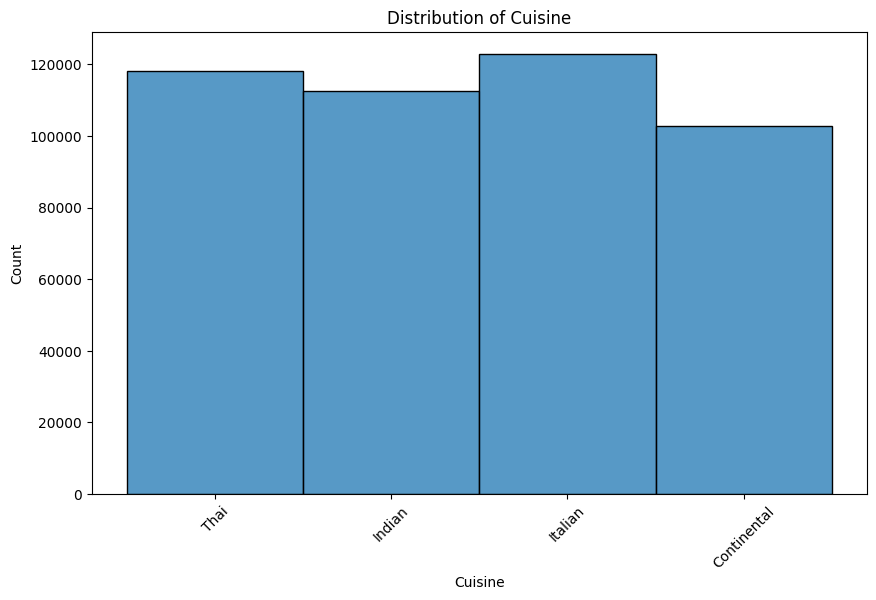

In [36]:
#hisogram for cuisine column

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(result['cuisine'])
plt.title('Distribution of Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [37]:

result[['checkout_price','base_price','num_orders','op_area']].describe()

,checkout_price,base_price,num_orders,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000
mean,354.628275,331.767285,261.872760,4.083590
std,160.691901,152.895903,395.922798,1.091686
min,55.350000,2.970000,13.000000,0.900000
25%,243.530000,228.920000,54.000000,3.600000
50%,311.430000,294.910000,136.000000,4.000000
75%,459.840000,445.230000,324.000000,4.500000
max,866.270000,866.270000,24299.000000,7.000000


In [38]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

<ipython-input-39-6088b40677d4>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='week', y='num_orders', data=result, ci=None)


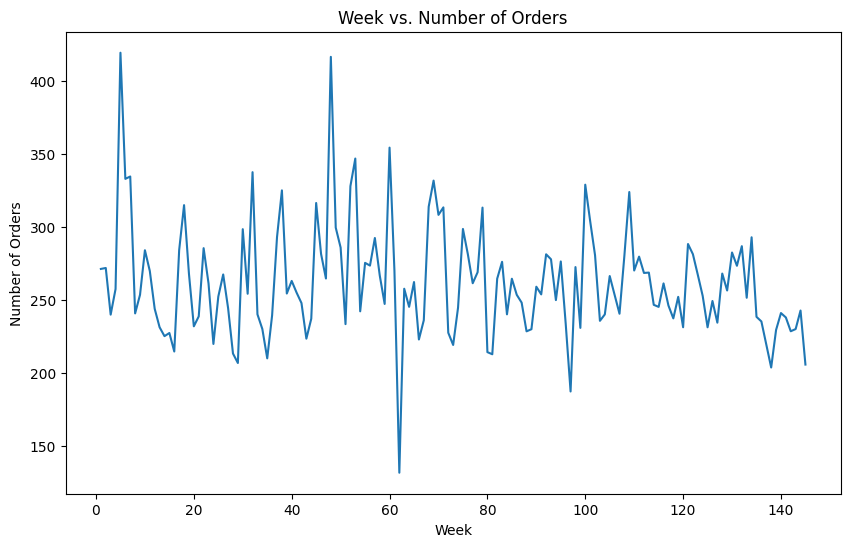

In [39]:
#line plot for week and num_orders

plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='num_orders', data=result, ci=None)
plt.title('Week vs. Number of Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()


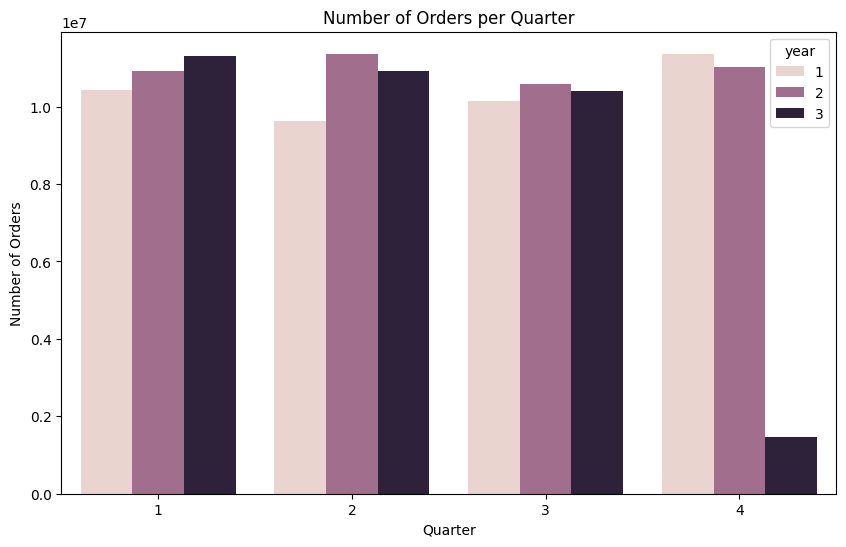

In [40]:
# number of orders per quarter side by side bar

import matplotlib.pyplot as plt
# quarter for each week
result['quarter'] = (result['week'] - 1) // 13 % 4 + 1
result['year'] = (result['week'] - 1) // 52 + 1

# Grouping data by year and quarter and calculate total orders
orders_by_quarter = result.groupby(['year', 'quarter'])['num_orders'].sum().reset_index()

# Ploting number of orders per quarter
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='num_orders', hue='year', data=orders_by_quarter)
plt.title('Number of Orders per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Orders')
plt.show()


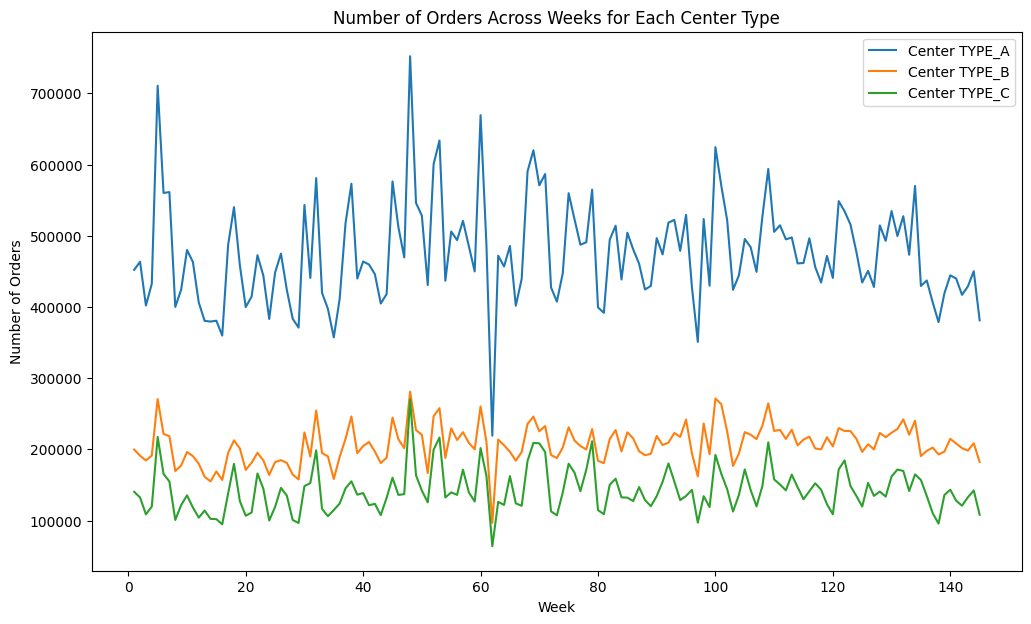

In [41]:

grouped_data = result.groupby(['center_type', 'week'])['num_orders'].sum().reset_index()
grouped_data
centers = grouped_data['center_type'].unique()
centers
plt.figure(figsize=(12, 7))
for center in centers:
    center_data = grouped_data[grouped_data['center_type'] == center]
    plt.plot(center_data['week'], center_data['num_orders'], label=f'Center {center}')

plt.title('Number of Orders Across Weeks for Each Center Type')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()




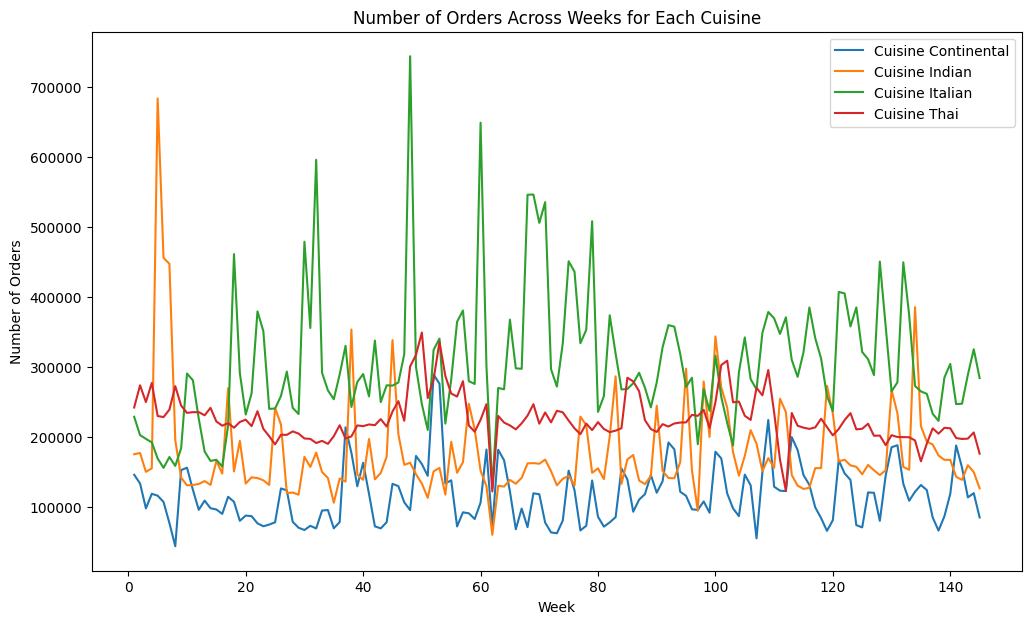

In [42]:
# line graph of number of orders for each cuisine across weeks

import matplotlib.pyplot as plt
grouped_data = result.groupby(['cuisine', 'week'])['num_orders'].sum().reset_index()
cuisines = grouped_data['cuisine'].unique()

plt.figure(figsize=(12, 7))
for cuisine in cuisines:
    cuisine_data = grouped_data[grouped_data['cuisine'] == cuisine]
    plt.plot(cuisine_data['week'], cuisine_data['num_orders'], label=f'Cuisine {cuisine}')

plt.title('Number of Orders Across Weeks for Each Cuisine')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


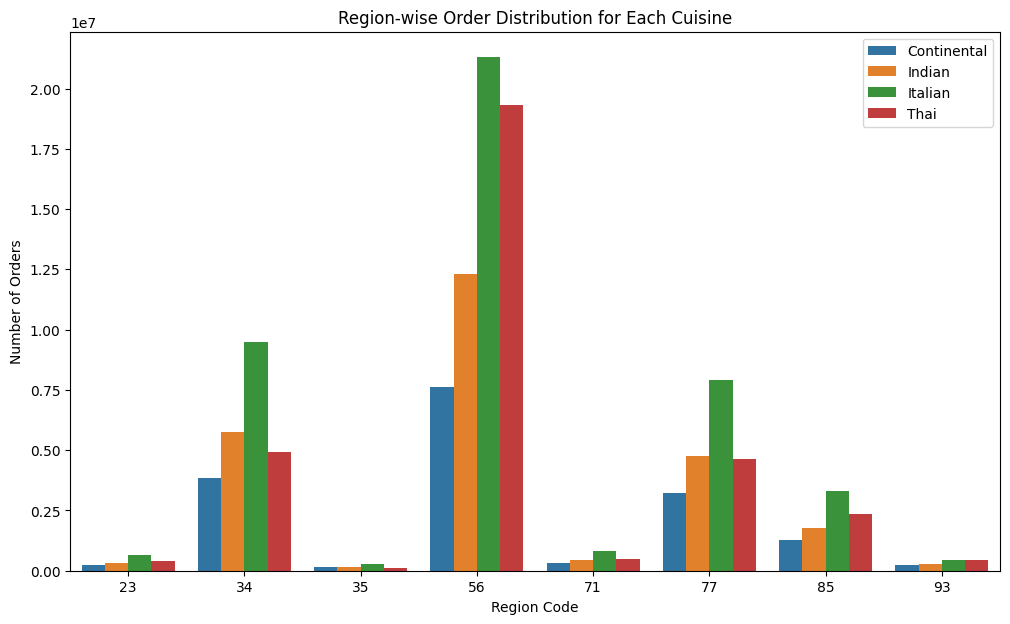

In [43]:
# Region-wise Order Distribution for Each Cuisine

import matplotlib.pyplot as plt
# Group the data by cuisine and region, and calculate the total number of orders
grouped_data = result.groupby(['cuisine', 'region_code'])['num_orders'].sum().reset_index()

# bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='region_code', y='num_orders', hue='cuisine', data=grouped_data)
plt.title('Region-wise Order Distribution for Each Cuisine')
plt.xlabel('Region Code')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


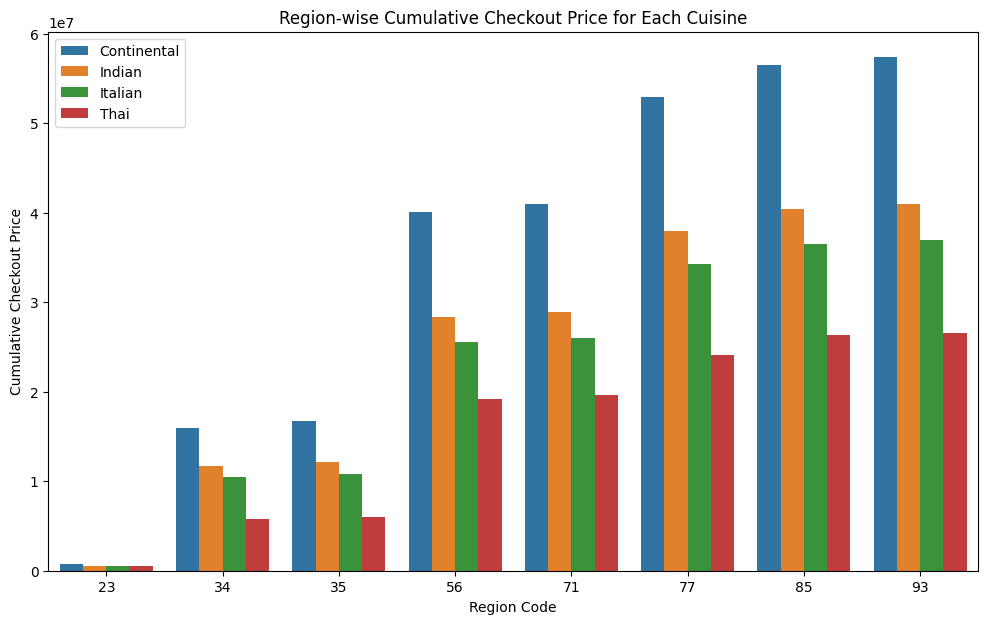

In [44]:
# Region-wise Cumulative Checkout Price for Each Cuisine

import matplotlib.pyplot as plt
# Group the data by cuisine, region_code and calculate cumulative sum of checkout_price
grouped_data = result.groupby(['cuisine', 'region_code'])['checkout_price'].sum().groupby(level=0).cumsum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='region_code', y='checkout_price', hue='cuisine', data=grouped_data)
plt.title('Region-wise Cumulative Checkout Price for Each Cuisine')
plt.xlabel('Region Code')
plt.ylabel('Cumulative Checkout Price')
plt.legend()
plt.show()


From the abve two plots we can conclude that despite of having low number of orders, region 35,71,93 have cumulative checkout price comparable to other regions.

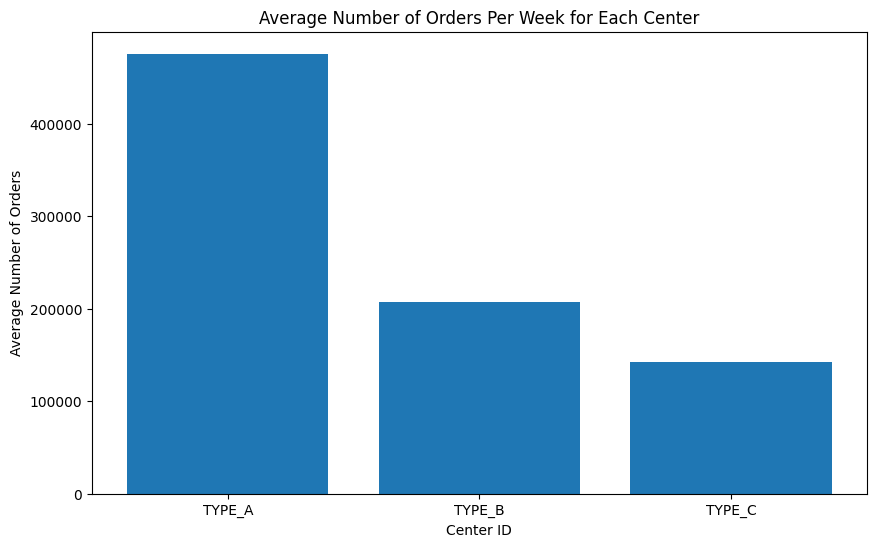

In [45]:
grouped_data = result.groupby(['center_type', 'week'])['num_orders'].sum().reset_index()
grouped_data
average_orders_per_week = grouped_data.groupby('center_type')['num_orders'].mean().reset_index()
average_orders_per_week
plt.figure(figsize=(10, 6))
plt.bar(average_orders_per_week['center_type'], average_orders_per_week['num_orders'])
plt.title('Average Number of Orders Per Week for Each Center')
plt.xlabel('Center ID')
plt.ylabel('Average Number of Orders')
plt.show()

In [46]:
grouped_category = result.groupby(['center_type', 'category'])['num_orders'].sum().reset_index()
grouped_category

,center_type,category,num_orders
0,TYPE_A,Beverages,24633857
1,TYPE_A,Biryani,348112
2,TYPE_A,Desert,1006575
3,TYPE_A,Extras,2385158
4,TYPE_A,Fish,468892
5,TYPE_A,Other Snacks,2721316
6,TYPE_A,Pasta,893619
7,TYPE_A,Pizza,4178759
8,TYPE_A,Rice Bowl,11847850
9,TYPE_A,Salad,5773622


In [48]:
top_three_categories = grouped_category.groupby('center_type').apply(lambda x: x.nlargest(3, 'num_orders')).reset_index(drop=True)
print("Top Three Categories for Each Center Type:")
top_three_categories

Top Three Categories for Each Center Type:


,center_type,category,num_orders
0,TYPE_A,Beverages,24633857
1,TYPE_A,Rice Bowl,11847850
2,TYPE_A,Sandwich,9844003
3,TYPE_B,Beverages,9340360
4,TYPE_B,Rice Bowl,5519104
5,TYPE_B,Sandwich,3760525
6,TYPE_C,Beverages,6506308
7,TYPE_C,Sandwich,4032254
8,TYPE_C,Rice Bowl,3507109


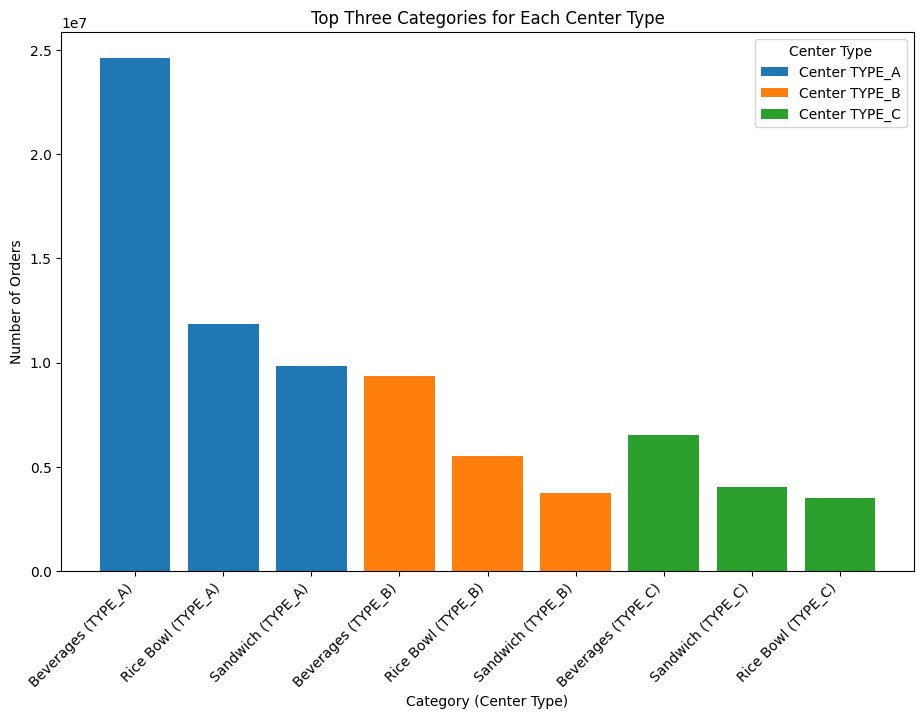

In [49]:
plt.figure(figsize=(11, 7))
for center in top_three_categories['center_type'].unique():
    center_data = top_three_categories[top_three_categories['center_type'] == center]
    plt.bar(center_data['category'] + " (" + center_data['center_type'] + ")", center_data['num_orders'], label=f'Center {center}')

plt.title('Top Three Categories for Each Center Type')
plt.xlabel('Category (Center Type)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Center Type')
plt.show()

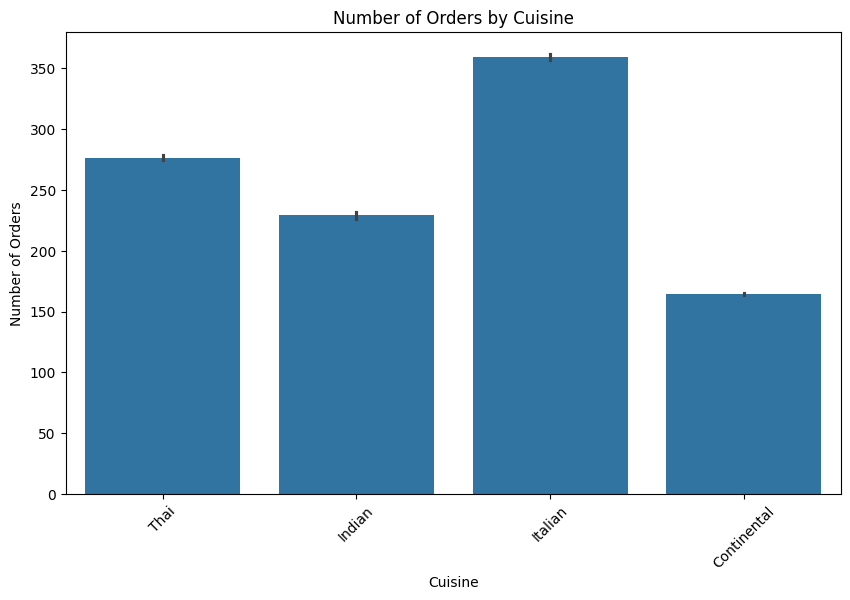

In [50]:
#bargrabh between num_orders and cuisines


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='num_orders', data=result)
plt.title('Number of Orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


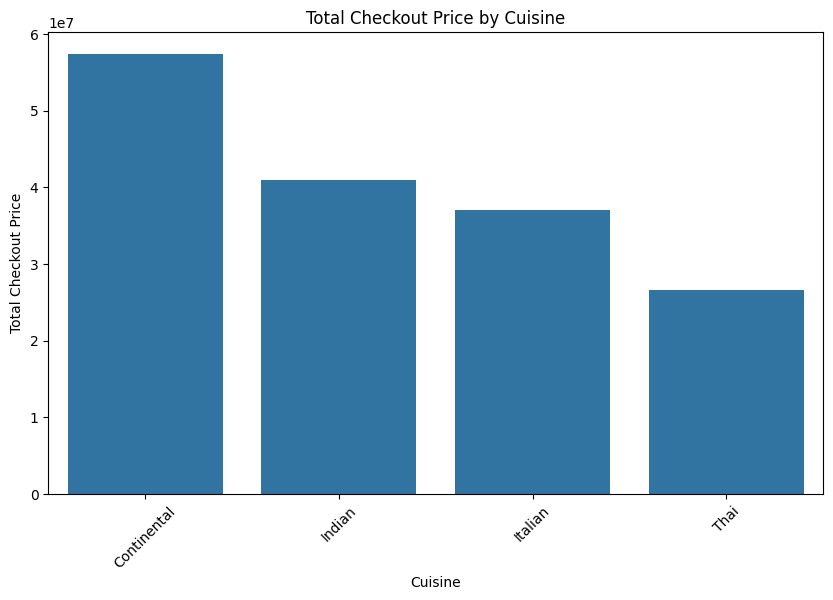

In [51]:
#bar graph for  cuisine and sum of checkout_price for each cuisine

import matplotlib.pyplot as plt
cuisine_checkout = result.groupby('cuisine')['checkout_price'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine', y='checkout_price', data=cuisine_checkout)
plt.title('Total Checkout Price by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Checkout Price')
plt.xticks(rotation=45)
plt.show()


In [52]:
numerical_columns = ['center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']

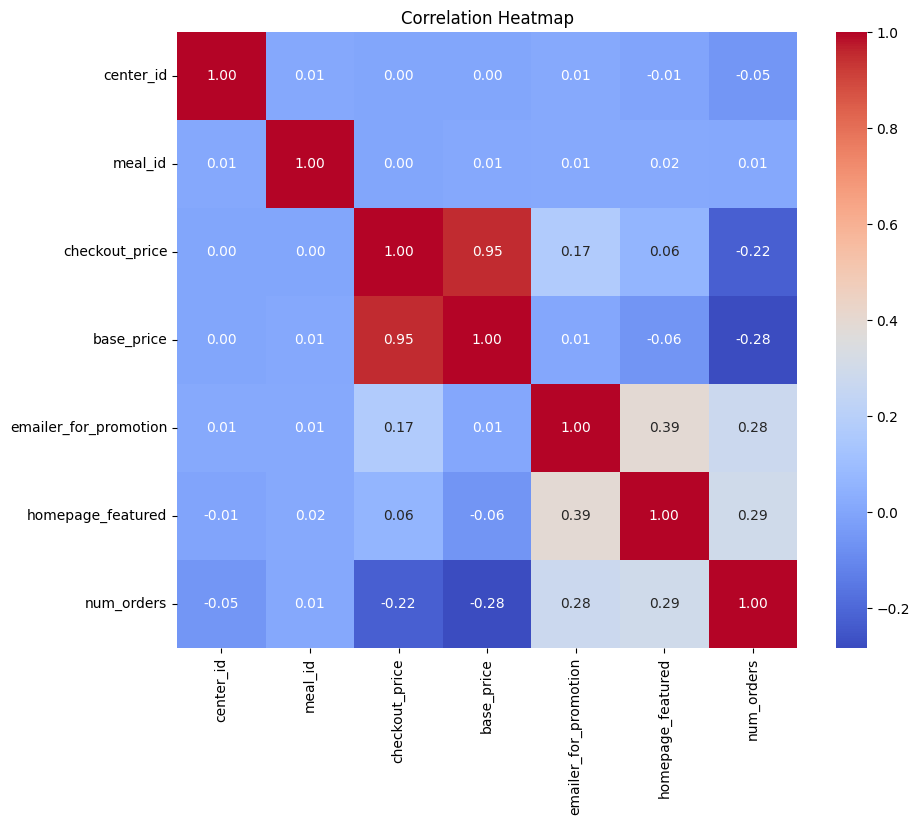

In [53]:

correlation_matrix = result[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

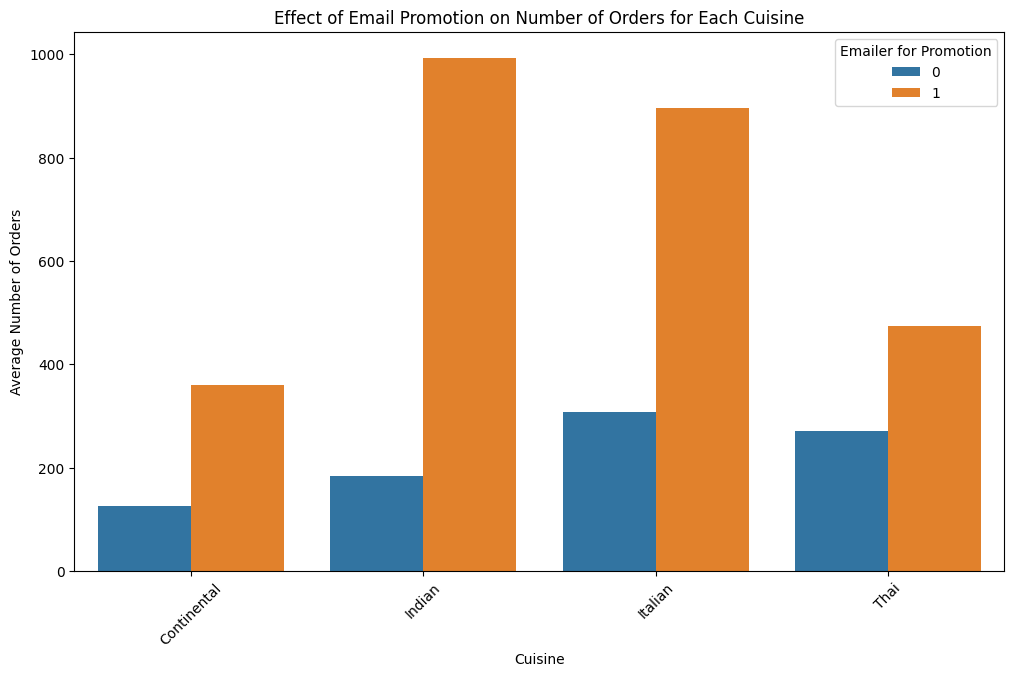

In [54]:
#effect of promotion on number of orders for each cuisine

import matplotlib.pyplot as plt
# Grouping the data by cuisine and emailer_for_promotion, and calculate the average number of orders
grouped_data = result.groupby(['cuisine', 'emailer_for_promotion'])['num_orders'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='cuisine', y='num_orders', hue='emailer_for_promotion', data=grouped_data)
plt.title('Effect of Email Promotion on Number of Orders for Each Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Emailer for Promotion')
plt.show()


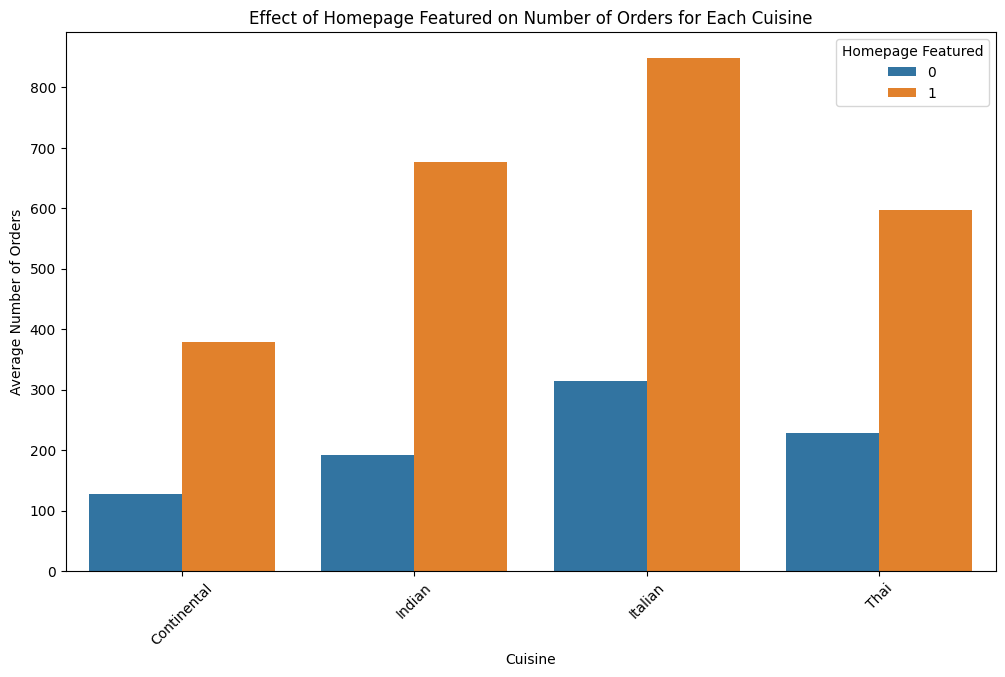

In [55]:
# number of orders for cuisine homepage featured and not

import matplotlib.pyplot as plt
# Group the data by cuisine and homepage_featured, and calculate the average number of orders
grouped_data = result.groupby(['cuisine', 'homepage_featured'])['num_orders'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='cuisine', y='num_orders', hue='homepage_featured', data=grouped_data)
plt.title('Effect of Homepage Featured on Number of Orders for Each Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Homepage Featured')
plt.show()


In [56]:
# new column named promotions
result['promotions'] = result['emailer_for_promotion'] + result['homepage_featured']
result.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,quarter,year,promotions
0,1379560,1,55,1885,152.29,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
1,1018704,2,55,1885,152.29,135.83,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
2,1196273,3,55,1885,133.92,132.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
4,1343872,5,55,1885,147.50,146.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0


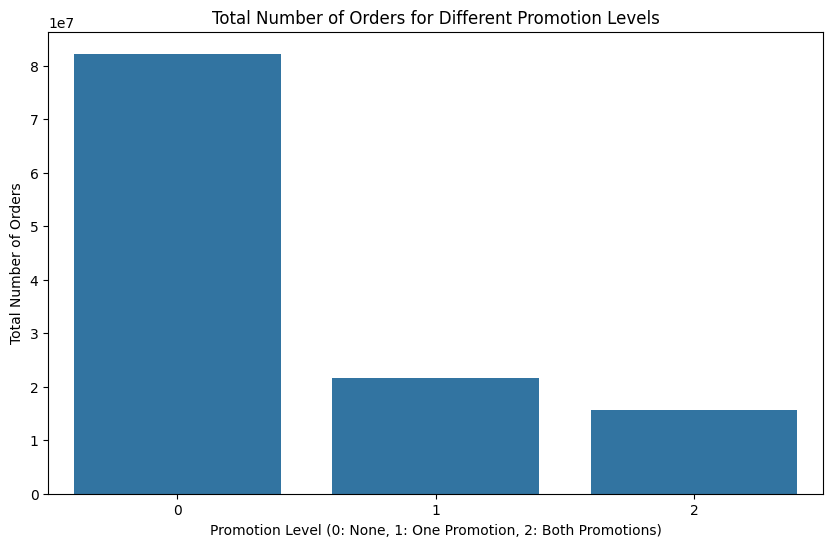

In [57]:
#number of orders for different values in promotion colum

import matplotlib.pyplot as plt
promo_orders = result.groupby('promotions')['num_orders'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='promotions', y='num_orders', data=promo_orders)
plt.title('Total Number of Orders for Different Promotion Levels')
plt.xlabel('Promotion Level (0: None, 1: One Promotion, 2: Both Promotions)')
plt.ylabel('Total Number of Orders')
plt.show()


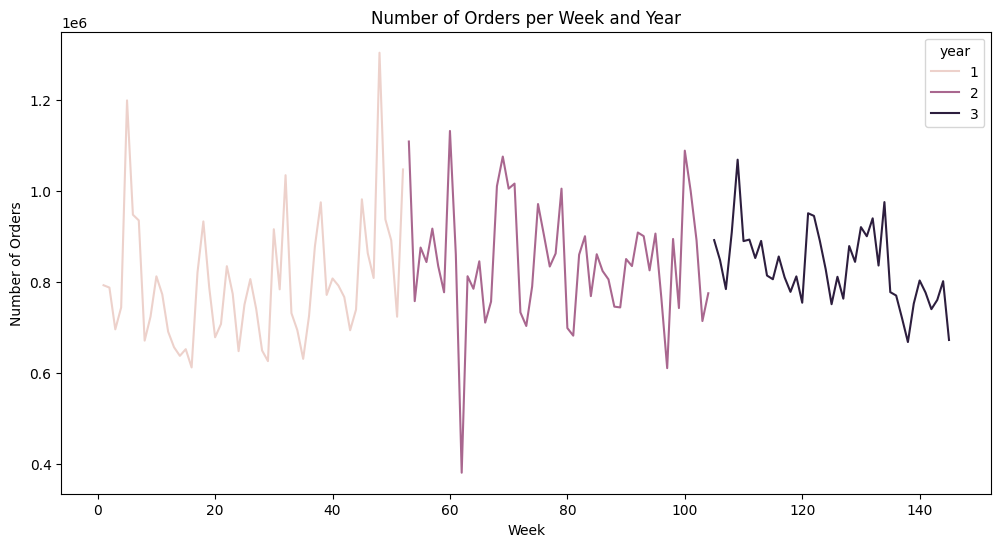

In [58]:
#plot number of orders versus (year,week)grouped together

import matplotlib.pyplot as plt
# Group data by year and week and calculate total orders
orders_by_year_week = result.groupby(['year', 'week'])['num_orders'].sum().reset_index()

# Plot number of orders per year and week
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='num_orders', hue='year', data=orders_by_year_week)
plt.title('Number of Orders per Week and Year')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()

In [60]:
# saving the resulting data frame in to a csv file

result.to_csv('result.csv', index=False)


In [61]:
result.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,quarter,year,promotions
0,1379560,1,55,1885,152.29,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
1,1018704,2,55,1885,152.29,135.83,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
2,1196273,3,55,1885,133.92,132.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0
4,1343872,5,55,1885,147.50,146.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,1,1,0


In [62]:
# number of orders for each week of each meal for each center

# Group the data by center_id, meal_id, and week, and calculate the total number of orders
grouped_data = result.groupby(['center_id', 'meal_id', 'week'])['num_orders'].sum().reset_index()

# Print the result
print(grouped_data)


        center_id  meal_id  week  num_orders
0              10     1062     1         865
1              10     1062     2         782
2              10     1062     3         851
3              10     1062     4        1202
4              10     1062     5         958
...           ...      ...   ...         ...
456543        186     2956   112          82
456544        186     2956   113          40
456545        186     2956   114          27
456546        186     2956   115          15
456547        186     2956   116         122

[456548 rows x 4 columns]


In [69]:
data_ohe=pd.get_dummies(result,columns=['category','cuisine','center_type'])

In [70]:
data_ohe.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1379560,1,55,1885,152.29,136.83,0,0,177,647,...,False,False,False,False,False,False,True,False,False,True
1,1018704,2,55,1885,152.29,135.83,0,0,323,647,...,False,False,False,False,False,False,True,False,False,True
2,1196273,3,55,1885,133.92,132.92,0,0,96,647,...,False,False,False,False,False,False,True,False,False,True
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,...,False,False,False,False,False,False,True,False,False,True
4,1343872,5,55,1885,147.50,146.50,0,0,215,647,...,False,False,False,False,False,False,True,False,False,True


In [71]:
data_ohe.shape

(456548, 36)

In [72]:
#droping the cols not needed

data_ohe = data_ohe.drop(['meal_id', 'id','base_price','emailer_for_promotion','homepage_featured','quarter','year'], axis=1)
data_ohe.head()


,week,center_id,checkout_price,num_orders,city_code,region_code,op_area,promotions,category_Beverages,category_Biryani,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1,55,152.29,177,647,56,2.0,0,True,False,...,False,False,False,False,False,False,True,False,False,True
1,2,55,152.29,323,647,56,2.0,0,True,False,...,False,False,False,False,False,False,True,False,False,True
2,3,55,133.92,96,647,56,2.0,0,True,False,...,False,False,False,False,False,False,True,False,False,True
3,4,55,135.86,163,647,56,2.0,0,True,False,...,False,False,False,False,False,False,True,False,False,True
4,5,55,147.50,215,647,56,2.0,0,True,False,...,False,False,False,False,False,False,True,False,False,True


In [73]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   center_id              456548 non-null  int64  
 2   checkout_price         456548 non-null  float64
 3   num_orders             456548 non-null  int64  
 4   city_code              456548 non-null  int64  
 5   region_code            456548 non-null  int64  
 6   op_area                456548 non-null  float64
 7   promotions             456548 non-null  int64  
 8   category_Beverages     456548 non-null  bool   
 9   category_Biryani       456548 non-null  bool   
 10  category_Desert        456548 non-null  bool   
 11  category_Extras        456548 non-null  bool   
 12  category_Fish          456548 non-null  bool   
 13  category_Other Snacks  456548 non-null  bool   
 14  category_Pasta         456548 non-nu

In [74]:
# train test split data_ohe
from sklearn.model_selection import train_test_split
x=data_ohe.drop('num_orders',axis=1)
y=data_ohe['num_orders']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
linear=LinearRegression()
linear.fit(x_train,y_train)
y_pred_lin=linear.predict(x_test)
print('root mean squared error',mean_squared_error(y_test,y_pred_lin,squared=False))
print('r2 score',r2_score(y_test,y_pred_lin))

root mean squared error 300.10821294085275
r2 score 0.4066681280737827


In [76]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(linear,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
print(mse)
mean_mse=np.mean(mse)
print(mean_mse)

[-90737.67020527 -91143.57019362 -95025.74457806 -97961.99660352
 -94079.98847385]
-93789.79401086246


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

selector = SelectFromModel(tree, prefit=True)
selected_features = x_train.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['week', 'center_id', 'checkout_price', 'city_code', 'op_area',
       'promotions', 'category_Rice Bowl', 'category_Sandwich'],
      dtype='object')


In [78]:
#colums having category in column name to selected_features
selected_features=selected_features.append(x_train.columns[x_train.columns.str.contains('category')])
print(selected_features)

Index(['week', 'center_id', 'checkout_price', 'city_code', 'op_area',
       'promotions', 'category_Rice Bowl', 'category_Sandwich',
       'category_Beverages', 'category_Biryani', 'category_Desert',
       'category_Extras', 'category_Fish', 'category_Other Snacks',
       'category_Pasta', 'category_Pizza', 'category_Rice Bowl',
       'category_Salad', 'category_Sandwich', 'category_Seafood',
       'category_Soup', 'category_Starters'],
      dtype='object')


In [79]:
linear.fit(x_train.loc[:,selected_features],y_train)
y_pred=linear.predict(x_test.loc[:,selected_features])
print('root mean squared error',mean_squared_error(y_test,y_pred,squared=False))
print('r2 score',r2_score(y_test,y_pred))

root mean squared error 310.18934135183946
r2 score 0.3661366265650865


In [80]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)
y_pred_ridge=ridge_regressor.predict(x_test)
print('mean squared error',mean_squared_error(y_test,y_pred_ridge))
print('r2 score',r2_score(y_test,y_pred_ridge))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.83572e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.27988e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.2938e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.27709e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning

mean squared error 90064.82705500291
r2 score 0.40666886867386565


In [81]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-93789.79334603707


In [82]:

from sklearn.metrics import mean_absolute_error
print('mean absolute error',mean_absolute_error(y_test,y_pred_ridge))


mean absolute error 160.9257275978072


In [83]:
# r2 score for ridge
y_pred_ridge=ridge_regressor.predict(x_test)
r2_score_ridge=r2_score(y_test,y_pred_ridge)
print(r2_score_ridge)

0.40666886867386565


In [84]:
print('rmse for ridge',mean_squared_error(y_test,y_pred_ridge,squared=False))

rmse for ridge 300.10802564243915


In [85]:
# lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+10, tolerance: 4.641e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+10, tolerance: 4.641e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.365e+10, tolerance: 4.605e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [86]:
y_pred_lasso=lasso_regressor.predict(x_test)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-93789.79401086182


In [87]:
r2_score_lasso=r2_score(y_test,y_pred_lasso)
print(r2_score_lasso)

0.4066681280809624


In [88]:
print('rmse for lasso',mean_squared_error(y_test,y_pred_lasso,squared=False))

rmse for lasso 300.108212939037


In [89]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Train an XGBoost model
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model_xgb.fit(x_train, y_train)

# Predict the next 10 weeks
y_pred_xgb = model_xgb.predict(x_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'RMSE: {rmse}')
# r2
r2 = r2_score(y_test, y_pred_xgb)
print(f'R-squared: {r2}')

RMSE: 199.31210191650754
R-squared: 0.7382966664008047


##SARIMA

In [91]:
# converting week number to date

import datetime

def week_to_date(week_num, year_start=2018):
  """Converts week number to a date in the format YYYY-MM-DD."""
  start_date = datetime.datetime.strptime(f'{year_start}-01-01', '%Y-%m-%d')
  days_to_add = (week_num - 1) * 7
  target_date = start_date + datetime.timedelta(days=days_to_add)
  return target_date.strftime('%Y-%m-%d')

# Apply the function to the 'week' column
result['date'] = result['week'].apply(week_to_date)

# Display the result
print(result[['week', 'date']].head())


   week        date
0     1  2018-01-01
1     2  2018-01-08
2     3  2018-01-15
3     4  2018-01-22
4     5  2018-01-29


In [92]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [93]:
df1 = result[['id', 'date', 'num_orders']]
df1.head()


,id,date,num_orders
0,1379560,2018-01-01,177
1,1018704,2018-01-08,323
2,1196273,2018-01-15,96
3,1116527,2018-01-22,163
4,1343872,2018-01-29,215


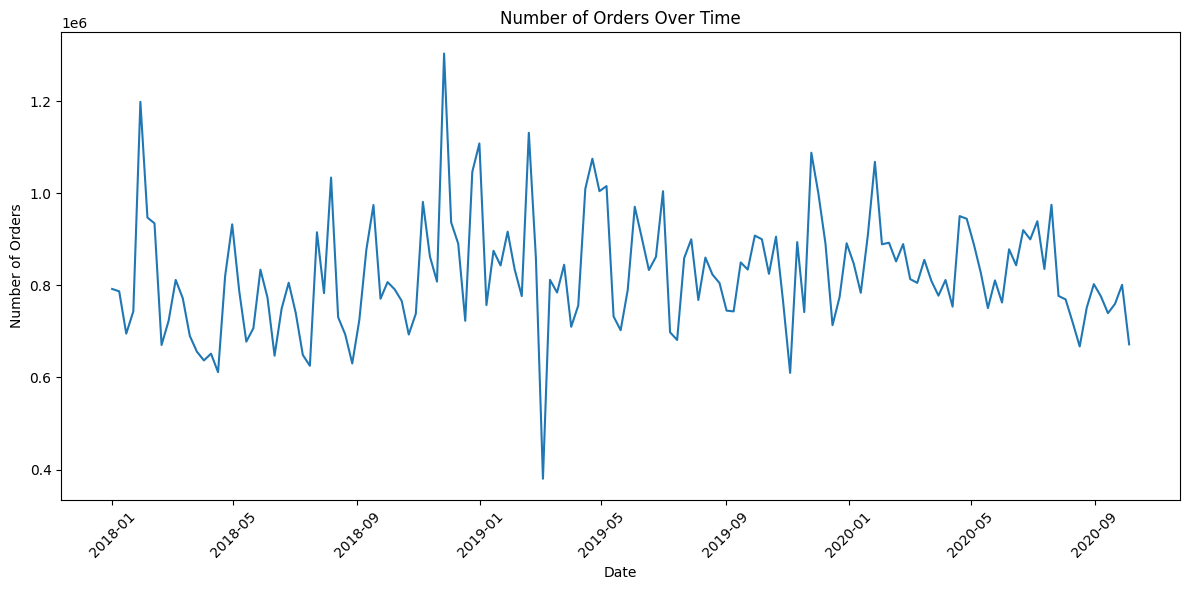

In [95]:
# number of orders vs group by date



# Grouping the data by date and sum the number of orders
orders_by_date = df1.groupby('date')['num_orders'].sum().reset_index()

# Converting the 'date' column to datetime objects for proper plotting
orders_by_date['date'] = pd.to_datetime(orders_by_date['date'])

# Ploting the number of orders over time
plt.figure(figsize=(12, 6))
plt.plot(orders_by_date['date'], orders_by_date['num_orders'])
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [96]:
#converting date to date time format

import pandas as pd
df1['date'] = pd.to_datetime(df1['date'])


<ipython-input-96-7756894a71e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          456548 non-null  int64         
 1   date        456548 non-null  datetime64[ns]
 2   num_orders  456548 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 10.4 MB


In [98]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [99]:
df1_weekly = df1.set_index('date').resample('W').agg({'id': 'first', 'num_orders': 'sum'}).reset_index()
print(df1_weekly)

          date       id  num_orders
0   2018-01-07  1379560      792261
1   2018-01-14  1018704      787084
2   2018-01-21  1196273      695262
3   2018-01-28  1116527      743529
4   2018-02-04  1343872     1198675
..         ...      ...         ...
140 2020-09-13  1236628      776240
141 2020-09-20  1436751      739661
142 2020-09-27  1161827      759926
143 2020-10-04  1292806      801197
144 2020-10-11  1336751      671926

[145 rows x 3 columns]


In [100]:
df1_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        145 non-null    datetime64[ns]
 1   id          145 non-null    int64         
 2   num_orders  145 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 3.5 KB


In [101]:
# date as index

df1_weekly = df1_weekly.set_index('date')
print(df1_weekly)


                 id  num_orders
date                           
2018-01-07  1379560      792261
2018-01-14  1018704      787084
2018-01-21  1196273      695262
2018-01-28  1116527      743529
2018-02-04  1343872     1198675
...             ...         ...
2020-09-13  1236628      776240
2020-09-20  1436751      739661
2020-09-27  1161827      759926
2020-10-04  1292806      801197
2020-10-11  1336751      671926

[145 rows x 2 columns]


In [102]:
df1_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-01-07 to 2020-10-11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          145 non-null    int64
 1   num_orders  145 non-null    int64
dtypes: int64(2)
memory usage: 3.4 KB


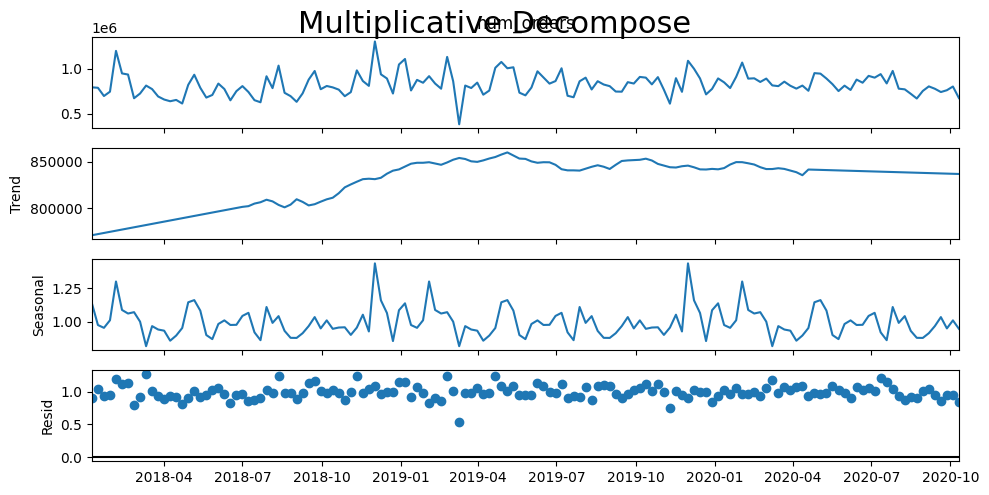

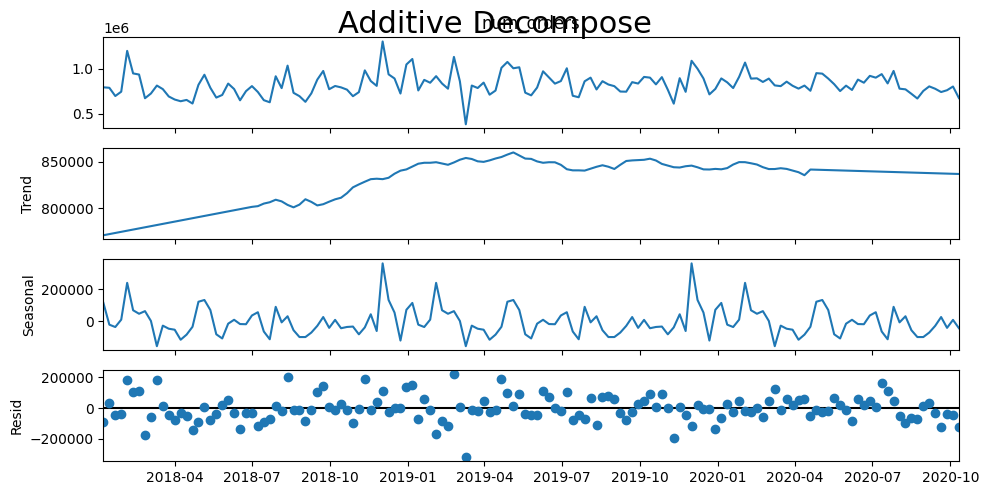

In [103]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition
result_mul = seasonal_decompose(df1_weekly['num_orders'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df1_weekly['num_orders'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [104]:
split_index = int(len(df1_weekly) * 0.9)

# Spliting the data
x1_train_w = df1_weekly['num_orders'][:split_index]
x1_test_w = df1_weekly['num_orders'][split_index:]

In [105]:
x1_train_w.shape,x1_test_w.shape

((130,), (15,))

In [106]:
import pmdarima as pm
#SARIMA--> seasonal True
model_w= pm.auto_arima(x1_train_w, seasonal=True, m=52,trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3422.132, Time=13.46 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3431.477, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3426.063, Time=0.84 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3424.595, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=3917.049, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3430.291, Time=2.73 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=3429.988, Time=3.28 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3425.514, Time=58.05 sec
 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=3423.807, Time=53.32 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=3429.397, Time=0.17 sec
 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=inf, Time=17.83 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=3423.399, Time=46.72 sec
 ARIMA(2,0,2)(2,0,2)[52] intercept   : AIC=3426.281, Time=64.46 sec
 ARIMA(1,0,2)(1,0,1)[52] intercept   : AIC=3429.350, Time=10.99 sec
 ARIMA(2,0,1)(1,0

In [107]:
pred_s_w = model_w.predict(x1_test_w.shape[0])

In [108]:
from pmdarima.metrics import smape
smape(x1_test_w,pred_s_w)

10.26802715219384